In [135]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [136]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

In [137]:
class_name=['ts/top','trous','pullover','dress','coat','sandal','sh','sneakers','bag','boot']

In [138]:
train_images.shape

(60000, 28, 28)

In [139]:
len(train_labels)

60000

In [140]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [141]:
test_images.shape

(10000, 28, 28)

In [142]:
len(test_labels)

10000

In [143]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

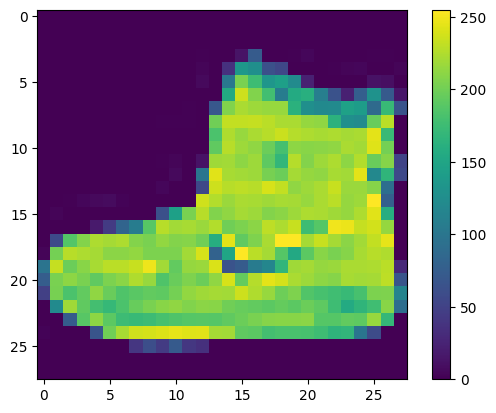

In [144]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [145]:
train_images=train_images/255.0
test_images=test_images/255.0

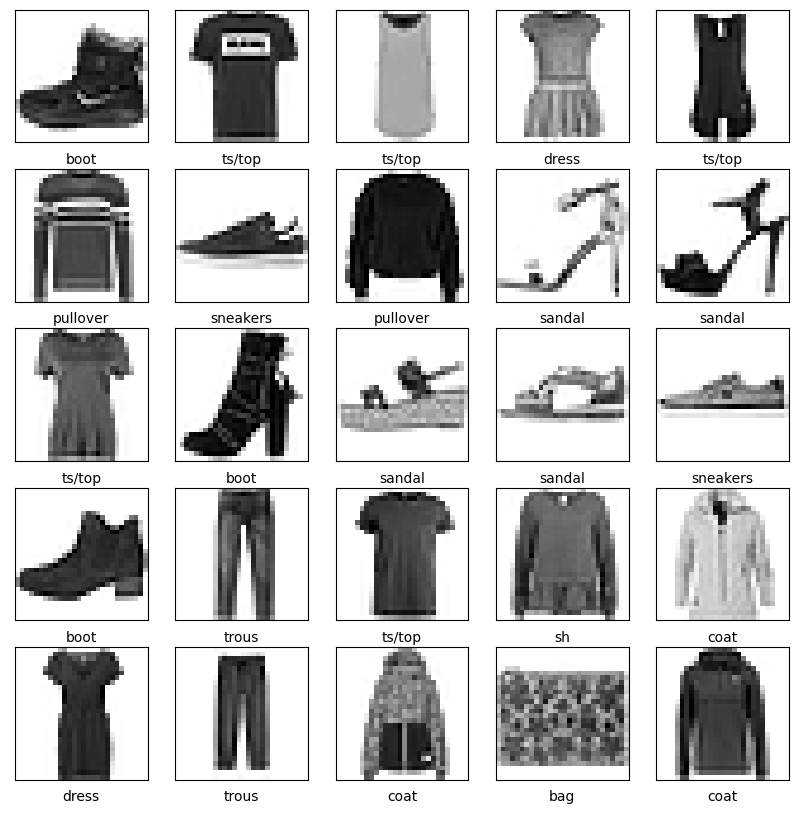

In [146]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_name[train_labels[i]])

plt.show()

In [147]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation='relu',), keras.layers.Dense(10)])

In [148]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [149]:
model.fit(train_images, train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5000 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3782 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3390 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3142 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2971 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2704 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2466 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

In [150]:

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.3479 - accuracy: 0.8844 - 472ms/epoch - 2ms/step


In [151]:
test_acc

0.8844000101089478

In [152]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [153]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 0s 986us/step


In [154]:
predictions[0]

array([6.2004546e-10, 6.6875352e-13, 4.6295012e-10, 7.1112994e-13,
       2.9985586e-08, 6.8817382e-05, 9.7532560e-09, 1.7456335e-03,
       8.3644932e-07, 9.9818462e-01], dtype=float32)

In [155]:
np.argmax(predictions[0])

9

In [156]:
test_labels[0]

9

In [157]:
def plot_images(i,predictions_array,true_label,img):
    true_label, img =true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel('{}{:2.0f}%({})'.format(class_name[predicted_label],100*np.max(predictions_array),class_name[true_label]),color=color)


In [158]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

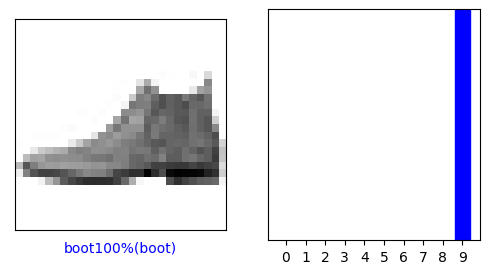

In [159]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

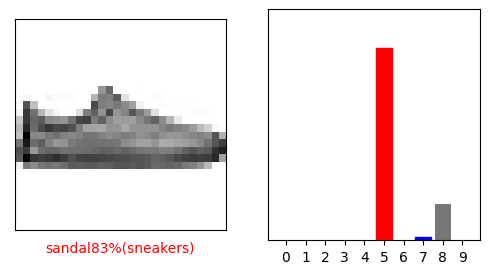

In [160]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions[i], test_labels)
plt.show()